In [1]:
import simpy
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [ ]:
# # Objective function (can be modified for different problems)
# def objective_function(position):
#     # Example: Rastrigin function (a common multimodal benchmark function)
#     return 10 * len(position) + sum([x**2 - 10 * np.cos(2 * np.pi * x) for x in position])

In [5]:
def objective_function(xy_tuple):
    x = xy_tuple[0]/2
    y = xy_tuple[1]/2
    return np.sin(x**3+ (y-5)**3) + np.cos((y-5)**2) *10 + np.cos(x*2) * 12 * (y-5)

In [61]:
def objective_function(x):
    """Three-hump camel function"""
    term1 = 2*(x[0]**2) - 1.05*(x[0]**4) + 0.166667*(x[0]**6) + x[0]*x[1] + x[1]**2
    return term1

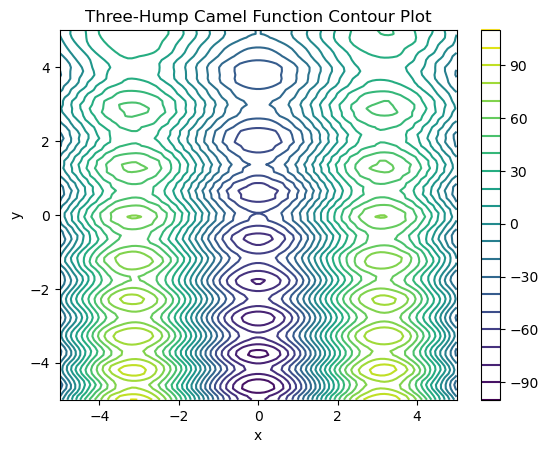

In [6]:
# Create a grid of x and y values
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

# Calculate the function values for each point on the grid
Z = objective_function([X, Y])

# Create the contour plot
plt.contour(X, Y, Z, levels=20)
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Three-Hump Camel Function Contour Plot')
plt.show()

In [55]:
def objective_function(x):
    """Easom function for testing optimization algorithms."""
    term1 =-np.cos(x[0]*2) * np.cos(x[1]*2) * np.exp(-((x[0]*2 - np.pi)**2 + (x[1]*2 - np.pi)**2)) * 0.5
    term2 =-np.cos((x[0]-3)*2) * np.cos((x[1]-2)*2) * np.exp(-(((x[0]-3)*2 - np.pi)**2 + ((x[1]-2)*2 - np.pi)**2)) * 0.5
    term3 =-np.cos((x[0]-2)*2) * np.cos((x[1]-3)*2) * np.exp(-(((x[0]-2)*2 - np.pi)**2 + ((x[1]-3)*2 - np.pi)**2))
    return term1 + term2 + term3

In [26]:
def objective_function(x):
    """Objective function with three local maxima and one global maximum."""
    term1 = -((x[0]-1)**2 + (x[1]-1)**2 - np.sin(5*(x[0]-1)))
    term2 = -((x[0]-4)**2 + (x[1]-4)**2 - np.sin(5*(x[1]-4)))
    term3 = 10 * np.exp(-((x[0]-2.5)**2 + (x[1]-2.5)**2))
    return term1 + term2 + term3

In [54]:
# Objective function (can be modified for different problems)
def objective_function(position):
    # Ensure the function works only for 2D input
    if len(position) != 2:
        raise ValueError("Himmelblau's function is defined for 2D inputs only.")
    x, y = position
    return ((x/100)**2 + (y/100) - 11)**2 + ((x/100) + (y/100)**2 - 7)**2 + np.sin(3*(x/100)+1.41) + np.sin(4*(y/100)-1.73)

In [35]:
objective_function([0,0])

169.99974626131313

In [36]:
objective_function([2.5,2.5])

169.07688705915874

In [34]:
objective_function([5,5])

168.1162862749585

In [62]:
# Initialization
# GSO Parameters
num_glowworms = 50       # Number of glowworms
dimension = 2            # Problem dimensionality
lower_bound = -5      # Lower bound of the search space
upper_bound = 5    # Upper bound of the search space
iterations = 500         # Number of iterations
luciferin_decay = 0.2    # Decay rate of luciferin
luciferin_enhancement = 0.8 # Enhancement of luciferin after each iteration
neighborhood_radius = 2 # Initial neighborhood radius
step_size = 0.03         # Movement step size

# Initialize glowworm positions and luciferin levels
np.random.seed(57)
glowworms = np.random.uniform(lower_bound, upper_bound, (num_glowworms, dimension))
luciferin = np.zeros(num_glowworms)


NameError: name 'LogNorm' is not defined

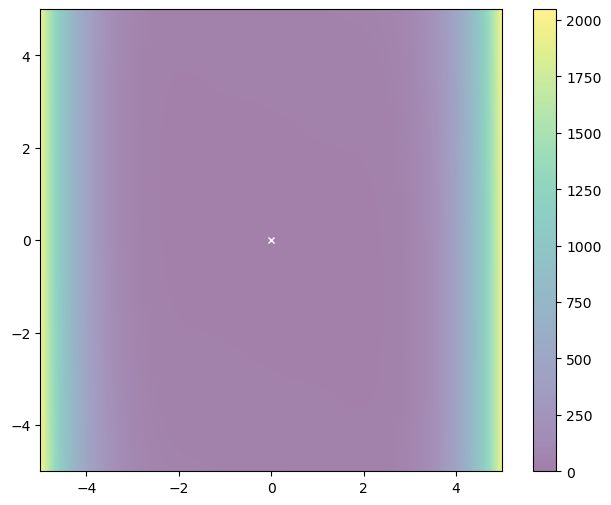

In [ ]:
# Plotting the objective function and Glowworm before searching
x, y = np.array(np.meshgrid(np.linspace(lower_bound, upper_bound, 1001), np.linspace(lower_bound, upper_bound, 1001)))
z = objective_function([x, y])
x_min, y_min = x.ravel()[z.argmin()], y.ravel()[z.argmin()]

fig, ax = plt.subplots(figsize=(8, 6))
img = ax.imshow(z, extent=[lower_bound, upper_bound, lower_bound, upper_bound], origin='lower', cmap='viridis', alpha=0.5)
fig.colorbar(img, ax=ax)
ax.plot([x_min], [y_min], marker='x', markersize=5, color="white")
contours = ax.contour(x, y, z, 10, colors='black', alpha=0.4)
ax.clabel(contours, inline=True, fontsize=8, fmt="%.0f")
p_plot = ax.scatter(glowworms[:,0], glowworms[:,1], marker='o', color='blue', alpha=0.5)
#nbest_plot = plt.scatter([glowworms[best_idx][0]], [glowworms[best_idx][1]], marker='*', s=100, color='black', alpha=0.4)

In [40]:
positions = []
# Main GSO loop
for iteration in range(iterations):
    # Update luciferin levels based on objective function values
    for i in range(num_glowworms):
        luciferin[i] = (1 - luciferin_decay) * luciferin[i] + luciferin_enhancement * (1 / (1 + objective_function(glowworms[i])))

    # Move glowworms towards neighbors with higher luciferin
    for i in range(num_glowworms):
        # Find neighbors within the neighborhood radius with higher luciferin levels
        neighbors = []
        for j in range(num_glowworms):
            if i != j:
                distance = np.linalg.norm(glowworms[i] - glowworms[j])
                if distance < neighborhood_radius and luciferin[j] > luciferin[i]:
                    neighbors.append(j)

        # Move towards a randomly selected neighbor with higher luciferin
        if neighbors:
            #print("TRUE for worm "+str(i))
            #print("Old position " + str(glowworms[i]))
            chosen_neighbor = glowworms[np.random.choice(neighbors)]
            direction = (chosen_neighbor - glowworms[i])
            direction /= np.linalg.norm(direction)  # Normalize direction
            #print(direction)
            glowworms[i] += step_size * direction  # Move towards neighbor
            #print("New position " + str(glowworms[i]))

    # Optional: Update neighborhood radius (dynamic radius adjustment)
    neighborhood_radius = max(0.1, neighborhood_radius * 0.95)  # Reduce radius gradually

    # Output best solution found in this iteration
    best_idx = np.argmin([objective_function(g) for g in glowworms])
print(f"Iteration {iteration + 1}, Best Position: {glowworms[best_idx]}, Best Value: {objective_function(glowworms[best_idx])}")
    # print(glowworms)


Iteration 500, Best Position: [2.9863781  1.88245215], Best Value: -1.014357031588219


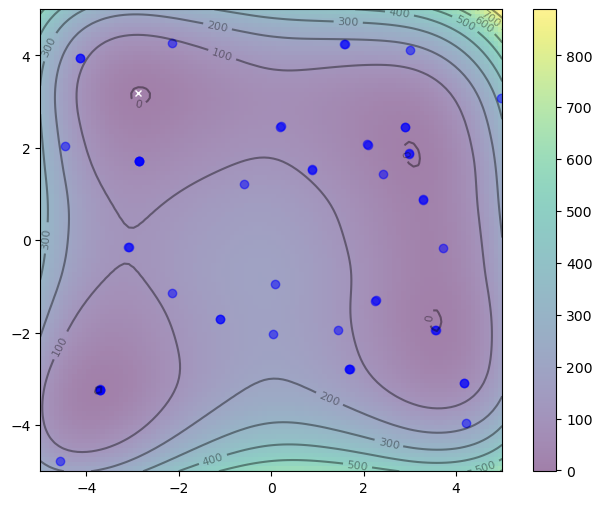

In [41]:
# Plotting the objective function and Glowworm after searching
x, y = np.array(np.meshgrid(np.linspace(lower_bound, upper_bound, 100), np.linspace(lower_bound, upper_bound, 100)))
z = objective_function([x, y])
x_min, y_min = x.ravel()[z.argmin()], y.ravel()[z.argmin()]

fig, ax = plt.subplots(figsize=(8, 6))
img = ax.imshow(z, extent=[lower_bound, upper_bound, lower_bound, upper_bound], origin='lower', cmap='viridis', alpha=0.5)
fig.colorbar(img, ax=ax)
ax.plot([x_min], [y_min], marker='x', markersize=5, color="white")
contours = ax.contour(x, y, z, 10, colors='black', alpha=0.4)
ax.clabel(contours, inline=True, fontsize=8, fmt="%.0f")
p_plot = ax.scatter(glowworms[:,0], glowworms[:,1], marker='o', color='blue', alpha=0.5)
#nbest_plot = plt.scatter([glowworms[best_idx][0]], [glowworms[best_idx][1]], marker='*', s=100, color='black', alpha=0.4)

In [36]:
# Final best position and value
best_idx = np.argmin([objective_function(g) for g in glowworms])
print("\nOptimal Position:", glowworms[best_idx])
print("Optimal Value:", objective_function(glowworms[best_idx]))



Optimal Position: [ 1.07826074 -0.91656087]
Optimal Value: 4.530612467798258


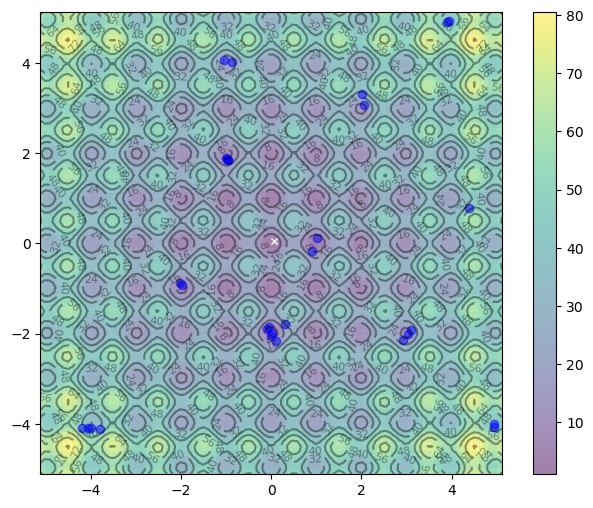

In [84]:
# Plotting the objective function
x, y = np.array(np.meshgrid(np.linspace(lower_bound, upper_bound, 100), np.linspace(lower_bound, upper_bound, 100)))
z = objective_function([x, y])
x_min, y_min = x.ravel()[z.argmin()], y.ravel()[z.argmin()]

fig, ax = plt.subplots(figsize=(8, 6))
img = ax.imshow(z, extent=[lower_bound, upper_bound, lower_bound, upper_bound], origin='lower', cmap='viridis', alpha=0.5)
fig.colorbar(img, ax=ax)
ax.plot([x_min], [y_min], marker='x', markersize=5, color="white")
contours = ax.contour(x, y, z, 10, colors='black', alpha=0.4)
ax.clabel(contours, inline=True, fontsize=8, fmt="%.0f")
p_plot = ax.scatter(positions[0][:,0], positions[0][:,1], marker='o', color='blue', alpha=0.5)
#nbest_plot = plt.scatter([glowworms[best_idx][0]], [glowworms[best_idx][1]], marker='*', s=100, color='black', alpha=0.4)

In [42]:
len(positions)

20

In [70]:
positions[6][:,0], positions[6][:,1]

(array([ 3.14607711, -1.10396657,  3.03725121,  2.5814425 ,  2.99440419,
        -3.21256392, -4.09722727, -1.05451189,  2.39679462, -3.8435299 ,
         4.01472712,  4.46270553, -3.01026806, -0.82393027, -4.90928137,
         0.07661577,  3.35702984,  0.05520867,  3.00700964, -0.94595281,
        -2.7356894 , -0.17343721, -4.33032774,  0.32461136,  1.15216515,
         1.81958622,  2.85161478,  3.30216898,  2.80474811, -3.15184385]),
 array([ 0.93739475, -3.24223046,  0.67815876,  0.66631992,  1.02415131,
         3.89245221, -3.00818875,  1.97879374,  0.57200696, -2.88877582,
        -0.99858817,  5.00111114,  3.9604659 ,  2.04110578,  0.07418729,
        -1.07151324,  0.9085666 , -1.28386975,  0.82445615, -3.40691821,
         3.97954872, -1.14547997, -3.11790691, -1.43368646, -4.9435382 ,
         1.88934448,  0.94754077, -3.54478233,  0.79260848,  3.66513581]))

MovieWriter imagemagick unavailable; using Pillow instead.


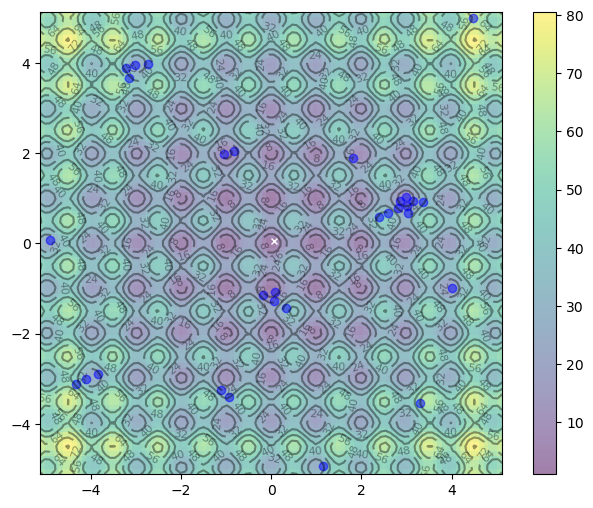

In [71]:
# Plotting and Animation
x, y = np.array(np.meshgrid(np.linspace(lower_bound, upper_bound, 100), np.linspace(lower_bound, upper_bound, 100)))
z = objective_function([x, y])
x_min, y_min = x.ravel()[z.argmin()], y.ravel()[z.argmin()]

fig, ax = plt.subplots(figsize=(8, 6))
img = ax.imshow(z, extent=[lower_bound, upper_bound, lower_bound, upper_bound], origin='lower', cmap='viridis', alpha=0.5)
fig.colorbar(img, ax=ax)
ax.plot([x_min], [y_min], marker='x', markersize=5, color="white")
contours = ax.contour(x, y, z, 10, colors='black', alpha=0.4)
ax.clabel(contours, inline=True, fontsize=8, fmt="%.0f")
#p_plot = ax.scatter(positions[0][:,0], positions[0][:,1], marker='o', color='blue', alpha=0.5)
#nbest_plot = plt.scatter([glowworms[best_idx][0]], [glowworms[best_idx][1]], marker='*', s=100, color='black', alpha=0.4)

def animate(i):
    ax.clear()
    ax.imshow(z, extent=[lower_bound, upper_bound, lower_bound, upper_bound], origin='lower', cmap='viridis', alpha=0.5)
    ax.plot([x_min], [y_min], marker='x', markersize=5, color="white")
    contours = ax.contour(x, y, z, 10, colors='black', alpha=0.4)
    ax.clabel(contours, inline=True, fontsize=8, fmt="%.0f")
    for pos in positions[i]:
        p_plot = ax.scatter(pos[0], pos[1], marker='o', color='blue', alpha=0.5)
    #nbest_plot.set_offsets(nbest.reshape(1, -1))
    return ax, p_plot

anim = FuncAnimation(fig, animate, frames=len(positions), interval=500, blit=False, repeat=True)
anim.save("Glowwarm.gif", dpi=120, writer="imagemagick")
plt.show()

#print("DPSO found best solution at f({})={}".format(nbest, nbest_obj))

Best Position (scaled back): [264.5457677  260.42130137]
Best Fitness: 0.00012131735589097505


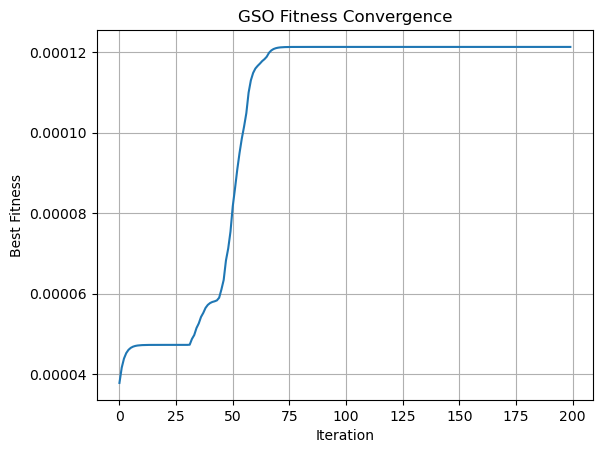

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

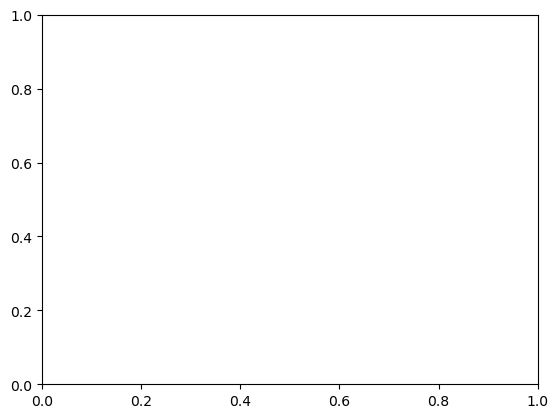

In [ ]:
##############################################################################
# Fitness Function
##############################################################################
def fitness_function(xy_tuple):
    x = xy_tuple[0] / 200
    y = xy_tuple[1] / 200
    return np.cos(x) * np.cos(y) * np.exp(-((x - np.pi)**2 + (y - np.pi)**2))

##############################################################################
# GSO Algorithm
##############################################################################
def glowworm_swarm_optimization(
    num_glowworms,
    dimensions,
    lower_bound,
    upper_bound,
    beta=0.08,
    gamma=0.6,
    rho=0.4,
    s=10,
    nt=5,
    max_iterations=100,
):
    # Initialize glowworm positions randomly
    positions = np.random.uniform(lower_bound, upper_bound, (num_glowworms, dimensions))

    # Initialize luciferin levels
    luciferin = np.array([fitness_function(pos) for pos in positions])

    # Initialize neighborhood ranges
    r_i = np.full(num_glowworms, (upper_bound - lower_bound) / 5)  # Initial visual range

    # Store the best fitness values found so far
    best_fitness_history = []
    best_position_history = []

    for iteration in range(max_iterations):
        # Update luciferin levels
        luciferin = (1 - rho) * luciferin + gamma * np.array(
            [fitness_function(pos) for pos in positions]
        )

        # Identify neighbors
        neighbors = [[] for _ in range(num_glowworms)]
        for i in range(num_glowworms):
            for j in range(num_glowworms):
                if i != j and np.linalg.norm(positions[i] - positions[j]) < r_i[i] and luciferin[j] > luciferin[i]:
                    neighbors[i].append(j)

        # Move towards brighter neighbors
        for i in range(num_glowworms):
            if neighbors[i]:
                probabilities = np.array([luciferin[j] - luciferin[i] for j in neighbors[i]])
                probabilities /= np.sum(probabilities)
                chosen_neighbor = np.random.choice(neighbors[i], p=probabilities)
                positions[i] += s * (positions[chosen_neighbor] - positions[i]) / np.linalg.norm(
                    positions[chosen_neighbor] - positions[i] + 1e-8
                )
                # Keep glowworms within the bounds
                positions[i] = np.clip(positions[i], lower_bound, upper_bound)

        # Update visual range
        for i in range(num_glowworms):
            n_i = len(neighbors[i])
            r_i[i] = min(upper_bound - lower_bound, max(0, r_i[i] + beta * (nt - n_i)))

        # Keep track of the best solution
        current_best_index = np.argmax(luciferin)
        best_fitness_history.append(luciferin[current_best_index])
        best_position_history.append(positions[current_best_index])

    best_fitness = best_fitness_history[-1]
    best_position = best_position_history[-1]

    return best_position, best_fitness, best_fitness_history, best_position_history


##############################################################################
# Implementation
##############################################################################
if __name__ == "__main__":
    num_glowworms = 30
    dimensions = 2
    lower_bound = -400
    upper_bound = 400
    max_iterations = 200

    best_position, best_fitness, fitness_history, position_history = glowworm_swarm_optimization(
        num_glowworms, dimensions, lower_bound, upper_bound, max_iterations=max_iterations
    )

    print("Best Position (scaled back):", best_position)
    print("Best Fitness:", best_fitness)

    # Visualization of fitness convergence
    plt.plot(fitness_history)
    plt.xlabel("Iteration")
    plt.ylabel("Best Fitness")
    plt.title("GSO Fitness Convergence")
    plt.grid(True)
    plt.show()